In [1]:
import numpy as np
import pandas as pd

### load dataset and extract a ndvector

In [2]:
rainfall = pd.read_csv('data/Seattle2014.csv')
rainfall.head(2)

,STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,WT01,WT05,WT02,WT03
0,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140101,0,0,0,72,33,12,340,310,36,40,-9999,-9999,-9999,-9999
1,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140102,41,0,0,106,61,32,190,200,94,116,-9999,-9999,-9999,-9999


In [3]:
inches_pd = (rainfall['PRCP'] / 254.).copy()
inches    = rainfall['PRCP'].values / 254.
print(type(inches),type(inches_pd),inches.shape,inches_pd.shape)

(<type 'numpy.ndarray'>, <class 'pandas.core.series.Series'>, (365,), (365,))


# Views, copies, and how to modifity them with awareness
https://www.practicaldatascience.org/html/views_and_copies_in_pandas.html
the issue came up while working on SiSensor optimisation..

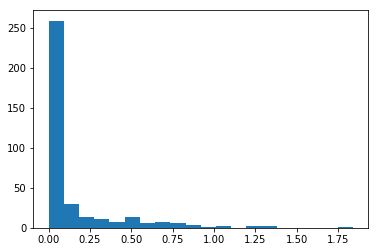

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
#import seaborn; seaborn.set()  # set plot styles
plt.hist(inches, 20);

## intro ufuncs for comparisons over arrays
- Universal Functions that NumPy's ufuncs can be used in place of loops to do fast element-wise arithmetic operations on arrays
- in the same way, we can use other ufuncs to do element-wise comparisons over arrays, and we can then manipulate the results to answer the questions we have.

In [5]:
x = np.array([1, 2, 3, 4, 5])
x < 3  # less than 
# above it's a short for
np.less(x,3)

array([ True,  True, False, False, False])

In [6]:
# <= also exists... 
np.less_equal(x,3)

array([ True,  True,  True, False, False])

In [7]:
x > 3  # less than
# above it's a short for
np.greater(x,3),'  ',np.greater_equal(x,3)

(array([False, False, False,  True,  True]),
 '  ',
 array([False, False,  True,  True,  True]))

In [8]:
np.not_equal(x,3), ' ', np.equal(x,3)

(array([ True,  True, False,  True,  True]),
 ' ',
 array([False, False,  True, False, False]))

It is also possible to do an element-wise comparison of two arrays, and to include compound expressions

In [9]:
(2 * x) == (x ** 2)
# which is the same as

np.equal((2 * x),(x ** 2))
# which is the same as

np.equal(  np.multiply(x,2)  ,  np.power(x,2)  )

array([False,  True, False, False, False])

## As in the case of arithmetic operators, the comparison operators are implemented as ufuncs in NumPy

Operator	Equivalent ufunc		Operator	Equivalent ufunc
==	np.equal		!=	np.not_equal
<	np.less		<=	np.less_equal
>	np.greater		>=	np.greater_equal

## Just as in the case of arithmetic ufuncs, these will work on arrays of any size and shape. Here is a two-dimensional example:

In [10]:
generator = np.random.RandomState(150777)
# which is the same as
generator = np.random.RandomState()
generator.seed(150777)

In [11]:
x = generator.randint(10,size=(3,4))
x

array([[6, 8, 9, 8],
       [9, 4, 6, 4],
       [1, 4, 9, 4]])

In [12]:
x < 5
# which is the same as
np.less(x,5)

array([[False, False, False, False],
       [False,  True, False,  True],
       [ True,  True, False,  True]])

# Working with Boolean Arrays

## Counting entries
To count the number of True entries in a Boolean array, np.count_nonzero is useful:

In [14]:
x < 6

array([[False, False, False, False],
       [False,  True, False,  True],
       [ True,  True, False,  True]])

In [13]:
# how many values less than 6?
np.count_nonzero(x < 6)

5

One can also use use np.sum; in this case, False is interpreted as 0, and True is interpreted as 1:

In [15]:
np.sum( x<6 )

5

In [16]:
# how many values less than 6 in each row?
np.sum(x < 6, axis=1)

array([0, 2, 3])

In [17]:
np.sum(x<6, axis=0 )

array([1, 2, 0, 2])

In [18]:
# are there any values greater than 8?
np.any(x)

True

In [20]:
# are all values less than 10?
np.all(x<10)

True

In [23]:
# are all values less than 9, within each column
np.all(x<9,axis=0)

array([False,  True, False,  True])

In [24]:
# are all values less than 9, within each row
np.all(x<9,axis=1)

array([False, False, False])

## Boolean operators
We've already seen how we might count, say, all days with rain less than four inches, or all days with rain greater than two inches. But what if we want to know about all days with rain less than four inches and greater than one inch? This is accomplished through Python's bitwise logic operators, &, |, ^, and ~. Like with the standard arithmetic operators, NumPy overloads these as ufuncs which work element-wise on (usually Boolean) arrays.

For example, we can address this sort of compound question as follows:

In [27]:
len((inches > 0.5) & (inches < 1))

365

In [36]:
(pd.Series((inches > 0.5) & (inches < 1)) ).describe()

count       365
unique        2
top       False
freq        336
dtype: object

In [25]:
np.sum((inches > 0.5) & (inches < 1))

29

In [37]:
np.sum(~( (inches <= 0.5) | (inches >= 1) ))

29